In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import MinMaxScaler

## EDA

### USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [19]:
users = pd.read_csv('./ml-1m/users.dat', sep='::', header=None, engine='python')
users.columns= ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [20]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


### MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

In [31]:
movies = pd.read_csv('./ml-1m/movies.dat', sep='::', header=None, engine='python', encoding = "ISO-8859-1")
movies.columns= ['MovieID', 'Title', 'Genres']
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings


In [66]:
ratings = pd.read_csv('./ml-1m/ratings.dat', sep='::', header=None, engine='python')
ratings.columns= ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.drop(columns=['Timestamp'], inplace=True)
ratings.head()

,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [68]:
ratings.shape

(1000209, 3)

In [69]:
ratings.Rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

### Normalize the ratings by user ratings
- Some users give high ratings to almost all movies, however some give very low ratings. To nullify the effect of user preferences, we can normalize the user ratings by substracting the mean rating for each user.

- To ensure our ratings columns has positive values, we will normalize it to contain rating between 0 and 1

In [70]:
temp_uid = ratings.groupby(by=['UserID']).mean()
temp_uid.head()

,MovieID,Rating
UserID,,
1,1560.547170,4.188679
2,1784.015504,3.713178
3,1787.450980,3.901961
4,1932.000000,4.190476
5,1762.747475,3.146465


In [84]:
ratings1 = pd.merge(ratings, temp_uid['Rating'], on='UserID')
ratings1['rating_normalized'] = ratings1.Rating_x - ratings1.Rating_y

In [117]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [121]:
ratings_normalized = NormalizeData(ratings1['rating_normalized'])
ratings1['rating_normalized'] = ratings_normalized
ratings1 = ratings1.rename(columns={'Rating_x': 'original_rating', 'Rating_y': 'mean_rating_by_user'})

In [123]:
ratings1.head()

,UserID,MovieID,original_rating,mean_rating_by_user,rating_normalized
0,1,1193,5,4.188679,0.619810
1,1,661,3,4.188679,0.356186
2,1,914,3,4.188679,0.356186
3,1,3408,4,4.188679,0.487998
4,1,2355,5,4.188679,0.619810


In [205]:
ratings1.groupby(by=['MovieID']).mean()

,UserID,original_rating,mean_rating_by_user,rating_normalized
MovieID,,,,
1,3053.819933,4.146846,3.667349,0.576072
2,3027.977175,3.201141,3.525284,0.470143
3,2632.156904,3.016736,3.456983,0.454839
4,3268.841176,2.729412,3.428227,0.420756
5,3143.152027,3.006757,3.426533,0.457537
...,...,...,...,...
3948,2063.107889,3.635731,3.608575,0.516448
3949,2289.046053,4.115132,3.566000,0.585251
3950,2123.370370,3.666667,3.614114,0.519796


We can observe from above table how rating_normalized takes care of user preference to always give high ratings or low ratings. Specifically, we can observe row number 3 and 5. Avg. rating for movie 3 is actually high, but after normalization, its lower than movie 5.

In [156]:
temp = ratings1.groupby(by = ['UserID']).mean()
temp.head()

,MovieID,original_rating,mean_rating_by_user,rating_normalized
UserID,,,,
1,1560.547170,4.188679,4.188679,0.512869
2,1784.015504,3.713178,3.713178,0.512869
3,1787.450980,3.901961,3.901961,0.512869
4,1932.000000,4.190476,4.190476,0.512869
5,1762.747475,3.146465,3.146465,0.512869


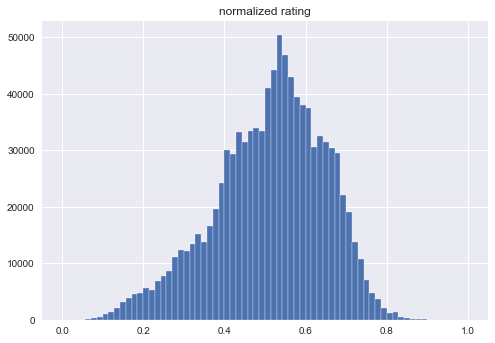

In [174]:
plt.hist(ratings1['rating_normalized'], bins=70)
plt.title('normalized rating')
plt.show()

In [193]:
ratings1['original_rating'].value_counts(normalize=True) * 100

4    34.889808
3    26.114242
5    22.626271
2    10.753453
1     5.616226
Name: original_rating, dtype: float64

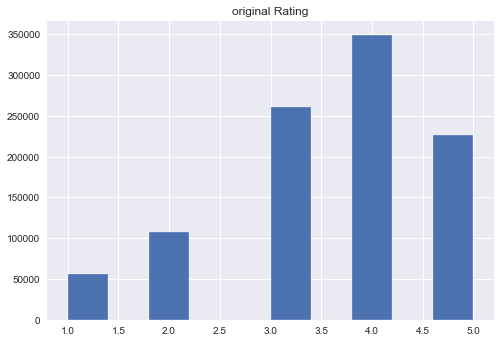

In [190]:
plt.hist(ratings1['original_rating'], bins=10)
plt.title('original Rating')
plt.show()

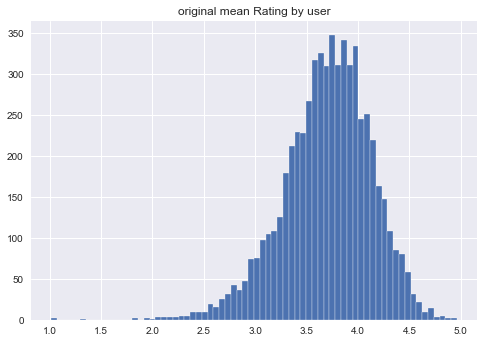

In [179]:
plt.hist(temp['original_rating'], bins=70)
plt.title('original mean Rating by user')
plt.show()

### Ratings per Movie

- Here, we will check what is the distribution of number of ratings for each movie.
- Minimum number of ratings for some movies is only 1. We need to remove such movies while suggesting top movies by genre.

In [200]:
temp = ratings1.groupby(by=['MovieID']).count()
temp.UserID.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: UserID, dtype: float64

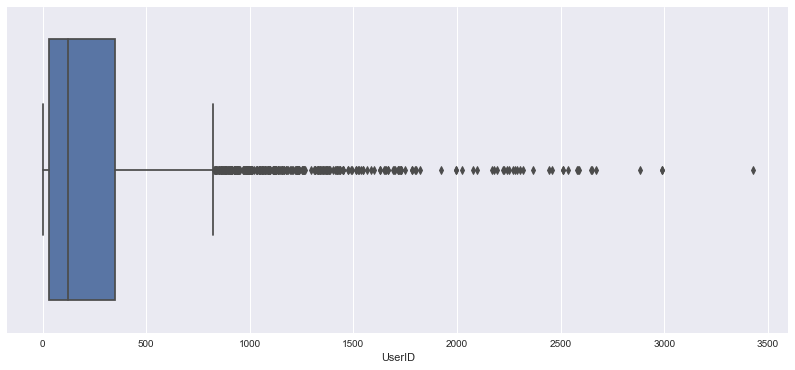

In [201]:
plt.figure(figsize=[14,6])
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=temp["UserID"])

### Ratings per User

- Here, we will check what is the distribution of number of ratings by each user.
- Minimum number of ratings per user are 20 which is good.

In [202]:
temp = ratings1.groupby(by=['UserID']).count()
temp.MovieID.describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: MovieID, dtype: float64

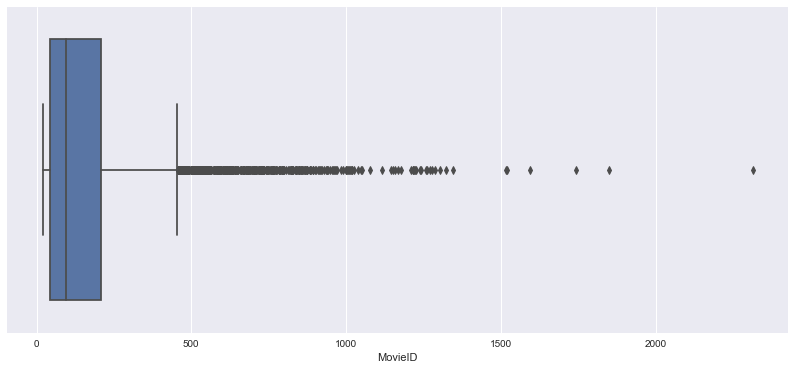

In [203]:
plt.figure(figsize=[14,6])
# sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=temp["MovieID"])
# plt.axvline(x=33, c='r')

In [180]:
movies.shape

(3883, 3)

In [182]:
len(ratings.MovieID.unique())

3706

There are 177 movies that have not been rated by any user.